# Composition

First we want to load our package with `using`, we will also want some Catlab utilities.

In [1]:
using AlgebraicMetabolism
using AlgebraicMetabolism.SSystems
using Catlab
using Catlab.ACSets
using Catlab.CategoricalAlgebra
using Catlab.CategoricalAlgebra.CSets
using Catlab.Graphics
using Catlab.Graphics.Graphviz
using Catlab.Programs
using Catlab.Programs.RelationalPrograms
draw(uwd::RelationDiagram) = to_graphviz(uwd,box_labels=:name, junction_labels=:variable)
draw(m::MetabolicNet) = to_graphviz(default_attrs(System, m))

draw (generic function with 2 methods)

Our model is going to be the very basic equation with 2 states and 3 edges.

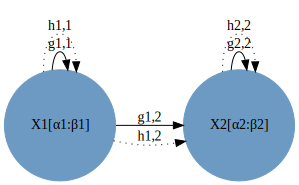

In [2]:
M = @acset MetabolicNet begin
  V = 2
  E₁ = 3
  E₂ = 3

  src₁ = [1,2,1]
  tgt₁ = [1,2,2]

  src₂ = [1,2,1]
  tgt₂ = [1,2,2]
end
draw(M)

We formulate an open version of this model by declaring an interface to it.
The interface is the first and second variable as the two exterior ports of the model.

In [3]:
Mₒ = OpenMetabolicNet(M,FinFunction([1],2),FinFunction([2],2));

The composition pattern below says to take two systems and compose
them so that the second interface of the first system is the first
interface of the second system.
Composition patterns have a tabular representation by default, because they are ACSets.

In [4]:
d = @relation (x,z) begin
  f(x,y)
  g(y,z)
end

Catlab.Programs.RelationalPrograms.UntypedUnnamedRelationDiagram{Symbol, Symbol} with elements Box = 1:2, Port = 1:4, OuterPort = 1:2, Junction = 1:3, Name = 1:0, VarName = 1:0
┌─────┬──────┐
│ Box │ name │
├─────┼──────┤
│   1 │    f │
│   2 │    g │
└─────┴──────┘
┌──────┬─────┬──────────┐
│ Port │ box │ junction │
├──────┼─────┼──────────┤
│    1 │   1 │        1 │
│    2 │   1 │        3 │
│    3 │   2 │        3 │
│    4 │   2 │        2 │
└──────┴─────┴──────────┘
┌───────────┬────────────────┐
│ OuterPort │ outer_junction │
├───────────┼────────────────┤
│         1 │              1 │
│         2 │              2 │
└───────────┴────────────────┘
┌──────────┬──────────┐
│ Junction │ variable │
├──────────┼──────────┤
│        1 │        x │
│        2 │        z │
│        3 │        y │
└──────────┴──────────┘

We can draw the composition pattern that we are going to use.

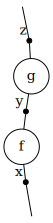

In [5]:
draw(d)

Then when we apply this composition pattern to two copies of our model,
we get the following composite model.

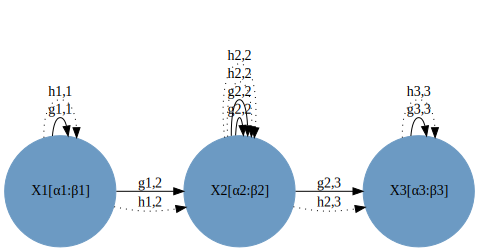

In [6]:
M₂ = oapply(d,[Mₒ,Mₒ])
draw(apex(M₂))

By reversing the interface ordering on the system, we can change the composite.

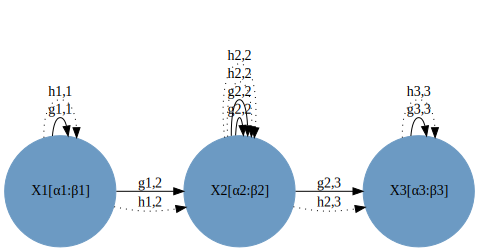

In [7]:
Mₒꜛ = OpenMetabolicNet(M, FinFunction([2],2), FinFunction([1],2))
M₂ꜛ = oapply(d,[Mₒ,Mₒꜛ])
draw(apex(M₂))

We can also take the output of a composition and plug it
in as the input to another level of composition.
This let us build models hierarchically.

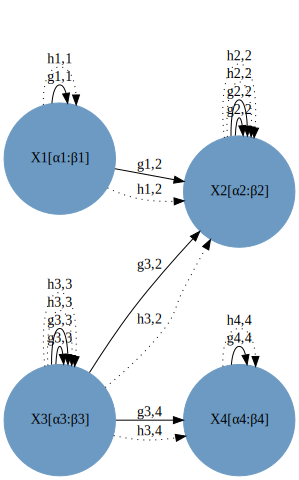

In [8]:
M₄ = oapply(d,[M₂ꜛ, Mₒ])
draw(apex(M₄))

Notice that this way of composition leads to duplicated arrows
at the places where you glue the models. The dynamics function
will do the math to multiply coefficients and add the exponents
or you could fix with this with ACSet rewriting using AlgebraicRewriting.jl
By specifying a pattern of duplicate edges and a rewrite rule that
that does the appropriate math on the model parameters associated with those interactions.